<a href="https://colab.research.google.com/github/kakik0u/JOHO/blob/main/5_3_%E7%A2%BA%E7%8E%87%E3%83%A2%E3%83%87%E3%83%AB_%E3%83%8E%E3%83%BC%E3%83%88%E3%83%96%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlibを日本語化するためのライブラリをインストールします。
# このファイルを開いたら、まずはこのコードセルを実行してください。
# 今後「import japanize_matplotlib」の行でエラーが出たら、このコードセルを実行し直してください。
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=564bbd7a016038b96c3f8294e72f54bf06a26ee6d9210b18796a9d6e7a39dc28
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


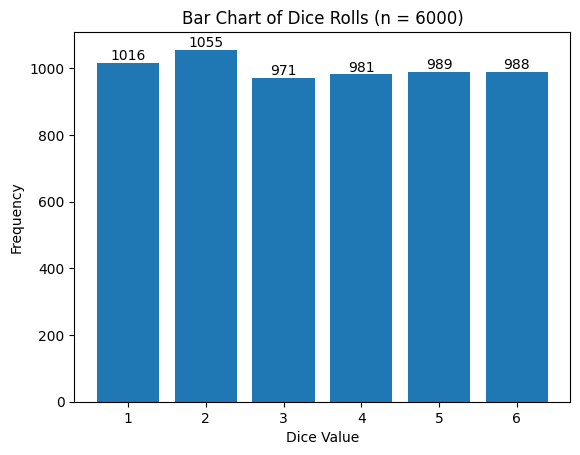

In [2]:
# 実習1 サイコロ
import matplotlib.pyplot as plt
import random

# サイコロをn回投げる
n = 6000

# サイコロの目の回数を保存するリストを初期化
counts = [0, 0, 0, 0, 0, 0]

# サイコロをn回投げて、出た目の数をカウント
for i in range(n):
    roll = random.randint(1, 6)
    counts[roll - 1] = counts[roll - 1] + 1

# 棒グラフを作成
plt.bar([1, 2, 3, 4, 5, 6], counts, tick_label=[1, 2, 3, 4, 5, 6])
plt.xlabel("Dice Value")
plt.ylabel("Frequency")
plt.title("Bar Chart of Dice Rolls (n = " + str(n) + ")")

# 各棒の上に回数を表示
for i in range(6):
    plt.text(i + 1, counts[i], str(counts[i]), ha="center", va="bottom")

# グラフを表示
plt.show()

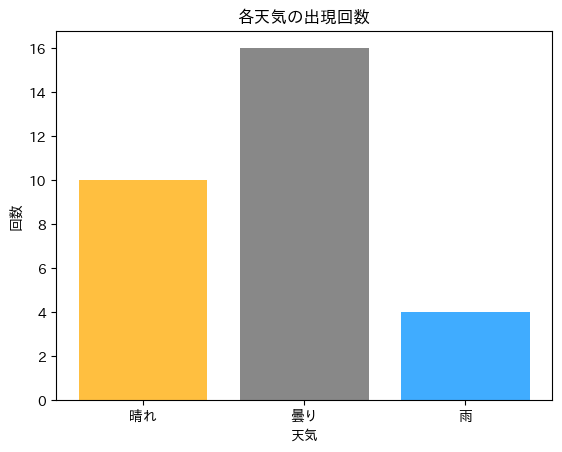

1 日目: 晴れ
2 日目: 晴れ
3 日目: 晴れ
4 日目: 曇り
5 日目: 曇り
6 日目: 晴れ
7 日目: 雨
8 日目: 曇り
9 日目: 晴れ
10 日目: 曇り
11 日目: 曇り
12 日目: 晴れ
13 日目: 曇り
14 日目: 曇り
15 日目: 曇り
16 日目: 晴れ
17 日目: 曇り
18 日目: 曇り
19 日目: 曇り
20 日目: 雨
21 日目: 曇り
22 日目: 雨
23 日目: 曇り
24 日目: 曇り
25 日目: 曇り
26 日目: 晴れ
27 日目: 雨
28 日目: 曇り
29 日目: 晴れ
30 日目: 晴れ
晴れ : 10	曇り : 16	雨 : 4	


In [3]:
# 実習2 天気のシミュレーション
import matplotlib.pyplot as plt # matplotlib: グラフを表示するためのライブラリ
import japanize_matplotlib      # japanize_matplotlib: matplotlibを日本語化するためのライブラリ
import random

# 天気の種類をリストで表す
weather_type = ["晴れ", "曇り", "雨"]
weather_counts = [0, 0, 0]       # 各天気の日数を数えるリスト（[晴れの日数, 曇りの日数, 雨の日数]）

# 遷移確率行列（0: 晴れ, 1: 曇り, 2: 雨）
transition_probs = [
    [0.5, 0.3, 0.2],   # 0: 晴れ -> [晴れ, 曇り, 雨]
    [0.4, 0.4, 0.2],   # 1: 曇り -> [晴れ, 曇り, 雨]
    [0.2, 0.5, 0.3]    # 2: 雨   -> [晴れ, 曇り, 雨]
]

# 初期設定
days = 30                # シミュレーション日数
weather = [0]            # 各日の天気を 0: 晴れ, 1: 曇り, 2: 雨 で格納するリスト（初日の天気 0: 晴れ）

# 天気予測シミュレーション
for i in range(1, days):
    probs = transition_probs[weather[len(weather) - 1]]   # 翌日の天気の確率のリストを取得。weather[len(weather) - 1]でweatherの末尾の値を取得。

    r = random.random()               # 乱数を発生させる
    if r < probs[0]:                  # 乱数が晴れの確率未満の場合、翌日は晴れ
        next_weather = 0
    elif r < probs[0] + probs[1]:     # 乱数が(晴れ＋曇り)の確率未満の場合、翌日は曇り（晴れは上記if文で除外されている）
        next_weather = 1
    else:                             # 乱数が上記以外の場合、翌日は雨
        next_weather = 2

    weather.append(next_weather)      # weatherリストに翌日の天気を代入

# 各天気の回数をカウント
for i in range(len(weather_type)):
    weather_counts[i] = weather.count(i)


# 天気の回数プロット（棒グラフ）
plt.bar(weather_type, weather_counts, color=["#FFBF40", "#888888", "#40ACFF"])
plt.xlabel("天気")
plt.ylabel("回数")
plt.title("各天気の出現回数")
plt.show()

# 数値データを文字列の天気に変換して表示
for i in range(len(weather)):
    print(i + 1, "日目:", weather_type[weather[i]])

for i in range(len(weather_type)):
    print(weather_type[i], ":", weather_counts[i], end="\t")
print()

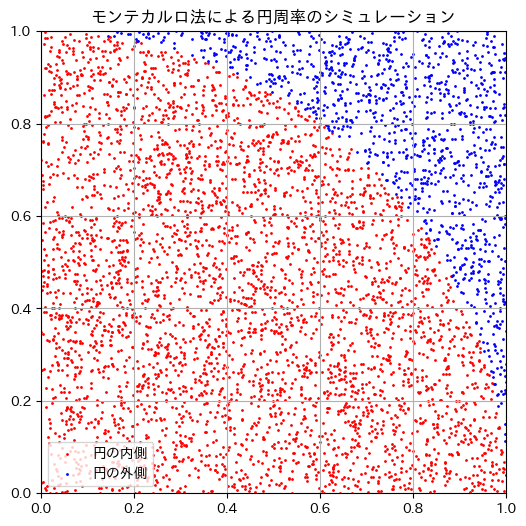

n = 5000
cnt = 3890
π = 3.112


In [6]:
# 実習3 モンテカルロ法を用いた円周率の近似計算
import matplotlib.pyplot as plt # matplotlib: グラフを表示するためのライブラリ
import japanize_matplotlib      # japanize_matplotlib: matplotlibを日本語化するためのライブラリ
import random

n = 5000  # 試行回数
cnt = 0   # 円の中に入った点の数

x1 = []
x2 = []
y1 = []
y2 = []

for i in range(n):
    x = random.random()
    y = random.random()

    if x**2 + y**2 < 1.0:
        x1.append(x)
        y1.append(y)
        cnt = cnt + 1
    else:
        x2.append(x)
        y2.append(y)

plt.figure(figsize=(6, 6))  # グラフのサイズを設定
plt.scatter(x1, y1, color="red", s=1, label="円の内側")
plt.scatter(x2, y2, color="blue", s=1, label="円の外側")

plt.title("モンテカルロ法による円周率のシミュレーション")  # グラフのタイトル
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.legend(loc="lower left")
plt.show()

print("n =", n)
print("cnt =", cnt)
print("π =", cnt / n * 4)

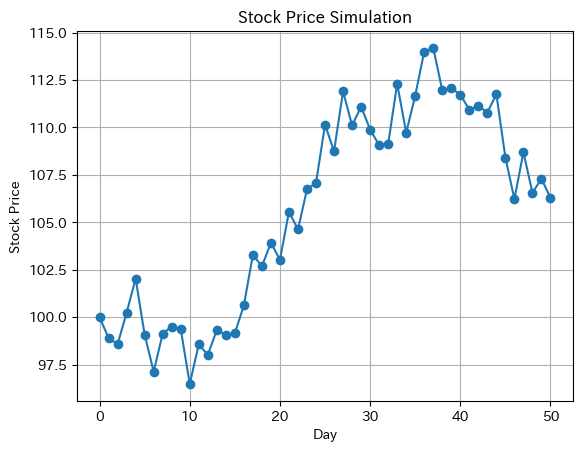

In [5]:
# 実習4 株価の変動シミュレーション①
import random
import matplotlib.pyplot as plt

# 初期設定
initial_price = 100  # 初期株価
days = 50  # 変動させる日数
price_changes = []  # 株価変動の履歴

# 初期株価をリストに追加
price_changes.append(initial_price)

# シミュレーション開始
current_price = initial_price
for i in range(days):
    # 1〜3%のランダムな増減
    change_rate = random.uniform(-0.03, 0.03)  # -3%～+3%のランダムな変動
    current_price = current_price * (1 + change_rate)
    price_changes.append(current_price)

# グラフの表示
plt.plot(range(days + 1), price_changes, marker="o")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation")
plt.grid(True)
plt.show()

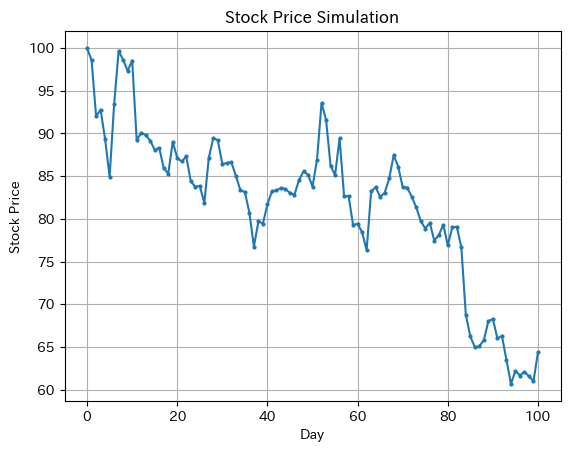

In [7]:
# 実習5 株価の変動シミュレーション②
import random
import matplotlib.pyplot as plt

# 初期設定
initial_price = 100  # 初期株価
days = 100  # シミュレーションする日数
trend = 0.002  # 上昇のトレンド要素（正の値で上昇、負の値で下降）
price_changes = [initial_price]

# シミュレーション開始
current_price = initial_price
for i in range(days):
    # 日ごとにボラティリティをランダムに設定（例: 1%から5%）
    daily_volatility = random.uniform(0.01, 0.05)

    # トレンド + ランダムな変動（ボラティリティに基づく）
    change_rate = trend + random.gauss(0, daily_volatility)  # 正規分布に基づく変動

    # 株価の更新
    current_price = current_price * (1 + change_rate)
    price_changes.append(current_price)

# グラフの表示
plt.plot(range(days + 1), price_changes, marker="o", markersize=2, linestyle="-")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation")
plt.grid(True)
plt.show()

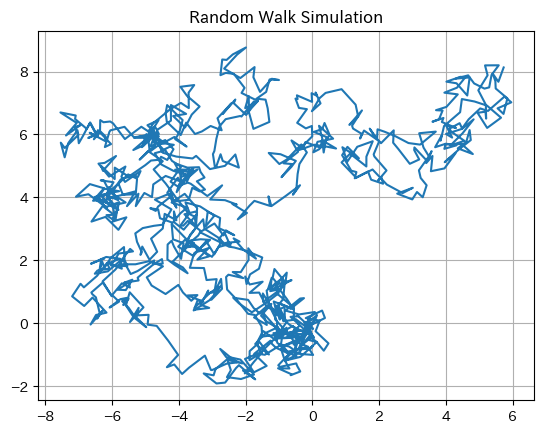

In [8]:
# 実習6 ブラウン運動のシミュレーション
import random
import matplotlib.pyplot as plt

# 移動回数
n = 1000

# 座標の初期化
x = [0]
y = [0]

# ランダムウォークのシミュレーション
for i in range(n):
    x.append(x[i] + random.random() - 0.5)
    y.append(y[i] + random.random() - 0.5)

# シミュレーションの結果をプロット
plt.plot(x, y)
plt.title("Random Walk Simulation")
plt.grid(True)

plt.show()